# Exploratory Data Analysis and Visualization
## Coursework

####  Import the dataset and the necessary libraries

In [26]:
# ! pip install pycountry
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from sklearn.linear_model import LinearRegression

df = pd.read_csv (r'countries.csv',sep=';')
df

,country,cases,deaths,population,flag
0,Austria,1376485,13436,9000000,au
1,Belgium,2347164,28566,11589000,be
2,Bulgaria,799943,31838,6948000,bu
3,Croatia,785033,12983,4105257,hr
4,Cyprus,215271,669,1207000,cy
5,Czechia,2562235,36765,10708000,ez
6,Denmark,1030638,3433,5792000,da
7,Estonia,260396,1967,1326535,en
8,Finland,347276,1688,5540720,fi
9,France,12934982,126305,65273511,fr


The dataset consists of 5 feautures. In particular, for every country we have the population, the number of people that had covid (cases) and the number of deaths due covid . The goal is to determine the impact of covid in each country. In the end of this analysis we will able to answer the following questions:

- **What percentage of people in each country was positive to covid?**
- **What percentage of those who had covid finally dead?**
- **Countries with the largest population had more cases and so more deaths?**
- **More cases mean more deaths?**
- **Which country suffered the most?**

In [27]:
# Get some firts statistics about the numerical values
statistics = df.describe()
statistics

,cases,deaths,population
count,3.000000e+01,30.000000,3.000000e+01
mean,2.191897e+06,30599.433333,1.503444e+07
std,3.046229e+06,41305.102511,2.150124e+07
min,6.915000e+03,42.000000,3.812800e+04
25%,3.755895e+05,2333.500000,2.239072e+06
50%,1.036425e+06,13209.500000,6.370000e+06
75%,2.226898e+06,35533.250000,1.136875e+07
max,1.293498e+07,139872.000000,8.378394e+07


## Preprocessing in order to display the flag of each country to the following plots

In [28]:
# http://www.famfamfam.com/lab/icons/flags/
# From this source I downloaded the flags

In [29]:
# In order to match each country with its flag, we should find the code of each country.
# So I used the library "pycountry" that provides the appropriate information about countries

# (Using the coding of flag columns,some flags images did not recognised so I used the following enconding instead of flags)

input_countries= df['country'] 

countries = {} 
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

codes = [countries.get(country, 'Unknown code') for country in input_countries]
print(codes)
df['country_encoding']=codes

['AT', 'BE', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'GR', 'HU', 'IS', 'IE', 'IT', 'LV', 'LI', 'LT', 'LU', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'SK', 'SI', 'ES', 'SE']


In [30]:
df

,country,cases,deaths,population,flag,country_encoding
0,Austria,1376485,13436,9000000,au,AT
1,Belgium,2347164,28566,11589000,be,BE
2,Bulgaria,799943,31838,6948000,bu,BG
3,Croatia,785033,12983,4105257,hr,HR
4,Cyprus,215271,669,1207000,cy,CY
5,Czechia,2562235,36765,10708000,ez,CZ
6,Denmark,1030638,3433,5792000,da,DK
7,Estonia,260396,1967,1326535,en,EE
8,Finland,347276,1688,5540720,fi,FI
9,France,12934982,126305,65273511,fr,FR


In [5]:
#  I define 2 functions in order to be able to display the flag of each country to the following plots

# path: the path that I saved the images of all the flags

# get_flag function: display every flag as an image
def get_flag(name):
    path = "C:/Users/eleft/Desktop/Exploratory Data Analysis/Coursework/flags/{}.png".format(name.title())
    im = plt.imread(path)
    return im

# offset_image: matches every flag with the corresponding country and displays it on the x-axis of the plots 
def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=2)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)
    ax.add_artist(ab)

# Analysis

### 1. Number of cases of each country

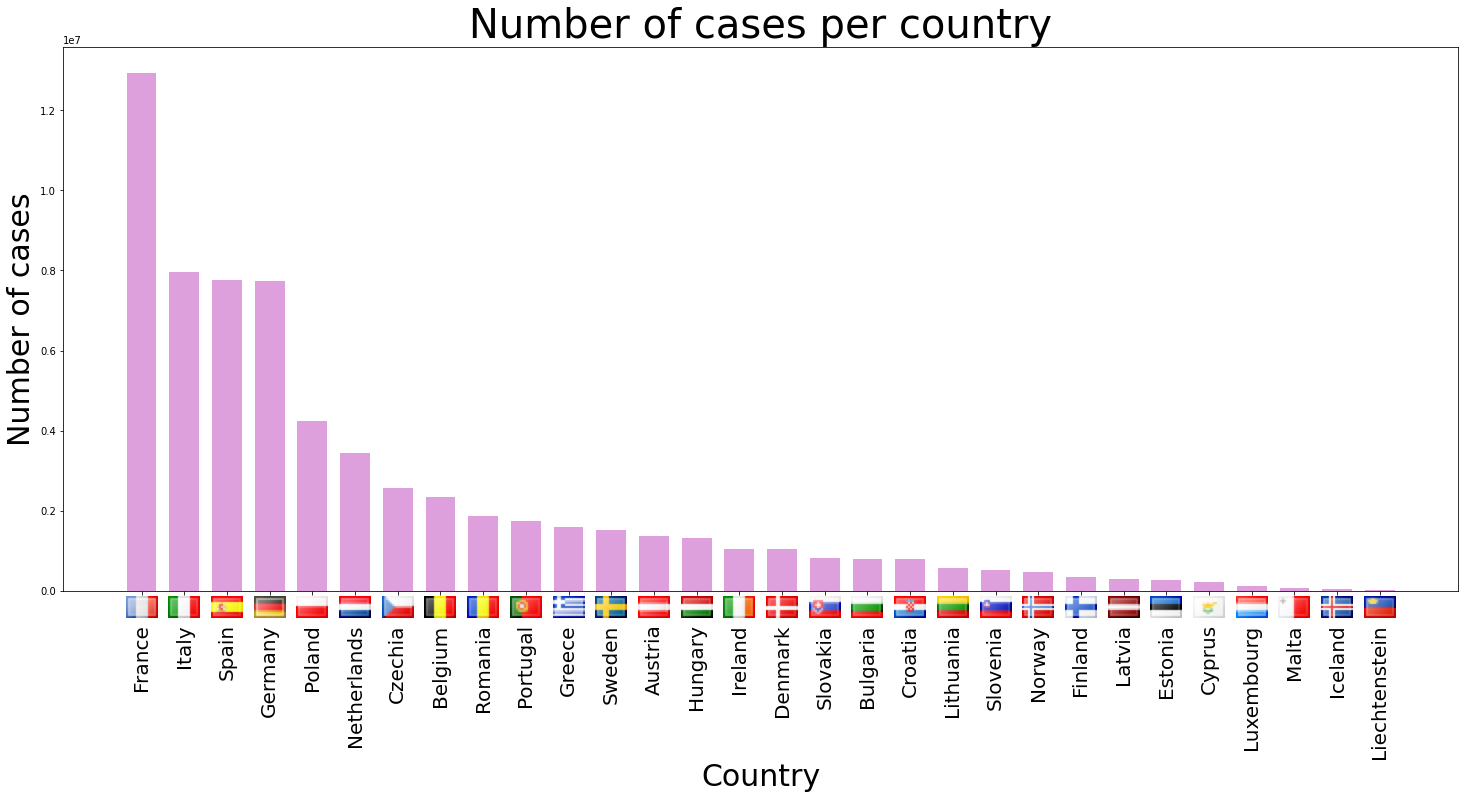

In [7]:
fig, ax = plt.subplots(figsize = (25, 10))


# sort the values to see the countries in an ascending order by number of cases in order to extract conclusions easier
df=df.sort_values('cases',ascending=False) 

# creating the bar plot
ax.bar(df['country'],df['cases'],color ='plum',width = 0.7) 
ax.set_xlabel("Country",size=30) 
ax.set_ylabel("Number of cases",size=30) 
ax.set_xticks(range(len(df['country'])), df['country'], rotation='vertical',size=20) 
ax.set_xticklabels(df['country'] ,rotation='vertical',size=20)
ax.tick_params(axis='x', which='major', pad=30)
ax.set_title("Number of cases per country",size=40)

# display the flags
for i, c in enumerate(df['country_encoding']):
    offset_image(i, c, ax)
    
plt.show()

Having a first look on the dataset we see the distribution of cases for each country. Countries on the left have the most cases in contrast with countries on the right.
To be more specific we observe that France has the largest number of cases. Italy, Spain and Germany follow France. It seems that the cases at the remain countries are significally fewer.

It would be misinformation if we extracted conclusion by observing only this diagramm. The population factor should be examined,too. Countries with larger population had more cases or there are countries with a small population that suffered from covid at most?

So it is worth to examine the percentage of cases in relation with the population of each country. 

An other question is generated:
How many of those who had covid died? Is this percentage significant?

Further analysis is conducted in order to extract valuable knowledge about the impact of Covid in each country.

## Percentages of cases/population and deaths/cases of each country

In [14]:
# Calculate the percentage of people that had covid for each country
df['cases/population']=round(df['cases']/df['population'],2)*100
df['cases/population']

# Calculate the percentage of people positive to covid that died
df['deaths/cases']=round(df['deaths']/df['cases'],2)*100
df['deaths/cases']

In [15]:
df

,country,cases,deaths,population,flag,country_encoding,cases/population,deaths/cases
9,France,12934982,126305,65273511,fr,FR,20.0,1.0
15,Italy,7971068,139872,60461000,it,IT,13.0,2.0
28,Spain,7771367,90508,46754000,sp,ES,17.0,1.0
10,Germany,7743228,115051,83783942,gm,DE,9.0,1.0
23,Poland,4248559,100938,37846000,pl,PL,11.0,2.0
21,Netherlands,3432119,21114,17134000,nl,NL,20.0,1.0
5,Czechia,2562235,36765,10708000,ez,CZ,24.0,1.0
1,Belgium,2347164,28566,11589000,be,BE,20.0,1.0
25,Romania,1866102,59114,19237000,ro,RO,10.0,3.0
24,Portugal,1734343,19181,10196000,po,PT,17.0,1.0


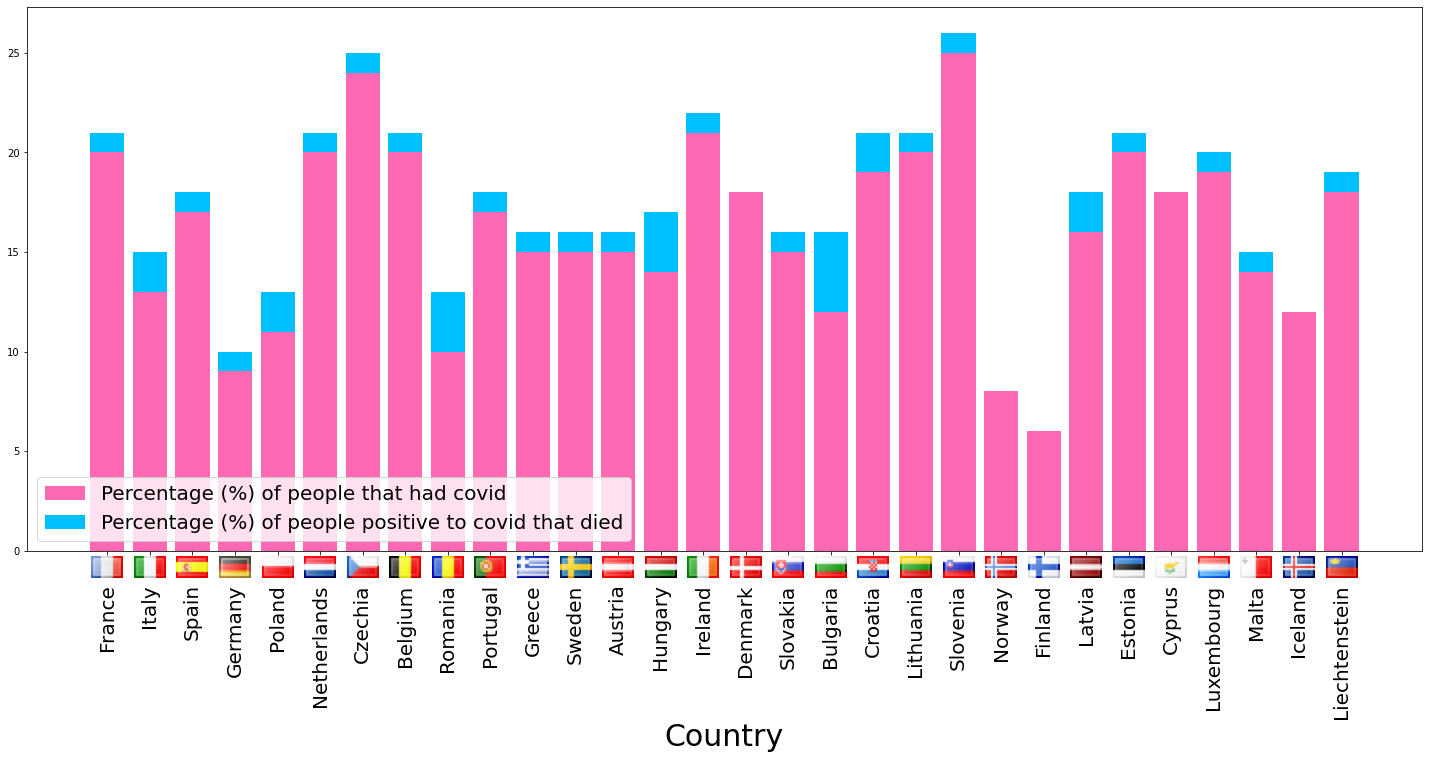

In [9]:
fig, ax = plt.subplots 
 
ax.bar(df['country'], df['cases/population'],color='hotpink') #percentage cases/population
ax.bar(df['country'],df['deaths/cases'],bottom=df['cases/population'],color='deepskyblue') #percentage deaths/cases

labels= ['Percentage (%) of people that had covid','Percentage (%) of people positive to covid that died']

ax.set_xlabel("Country",size=30)
ax.set_xticks(range(len(df['country'])), df['country'], rotation='vertical',size=20)
ax.tick_params(axis='x', which='major', pad=30)
ax.set_title("",size=40)
ax.legend(labels,fontsize=20,loc=3)


for i, c in enumerate(df['country_encoding']):
    offset_image(i, c, ax)

plt.show()

Looking at the diagram above, pink colour shows the percentage of people that had covid and blue colour how many of those who had Covid died. 
A first worthful observation is that the percentage of those who died is significant smaller of those who had Covid. This is an indication that Covid is not a deathly virus in the general population. However as it is known it affects more some group of people.

Let's interpret the diagram in detail. Firstly let's compare it with the previous one. As we saw in the previous barplot, Slovenia had a small number of cases. However here we see that Slovenia had the larget percentage of cases in relation with its population. So even the number of cases is smaller than other countries, it is a very significant percentage if we take into account its population. Czechia also is in a similar situation. Furthermore as we see the diagram the last 5 countries that had a smaller percentage of cases, the percentage is large if we consider about population.

So to generalize it, as it is mentioned before, we can't conclude about the cases without examine the population of each country.


Finland and Norway seems to have the minimum damage from Covid. We observe a small number of cases in relation with their population and the deaths are zero. Denmark, Cyprus and Iceland also have not deaths. (Actually may deaths are not null but very few in contrast with the cases)

Bulgaria, Roumania and Hungary seems to affected from Covid the most since they have the largest percentage of people who died from Covid.

Looking the percentage of deaths in the other countries, all have a similar percentage.

## Heatmap

So finally, more cases mean more deaths?

To answer this question, correlation between them should be examined.

In [18]:
columns=['deaths','cases']
corr=df[columns].corr()
corr

,deaths,cases
deaths,1.000000,0.912734
cases,0.912734,1.000000


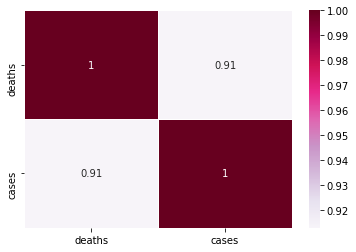

In [17]:
sns.heatmap(corr, annot=True, linewidths=.5, cmap="PuRd")
plt.show()

The correlation equals almost to one so this is indication that there is strong linear relationship between the number of cases and the number of deaths. So let's estimate the equation of this linear regression and plot it in the corresponding scatterplot to confirm that indication.

## Linear Regression

In [24]:
model = LinearRegression()
model.fit(df[['cases']],df['deaths'])
y_pred=model.predict(df[['cases']])
print(y_pred)
#model
#ypred = model.predict(df[['deaths']])

[163557.45990575 102123.31827701  99651.78885136  99303.53638138
  56052.99048321  45948.60700852  35182.79260147  32521.04175843
  26567.34654127  24936.67746303  23180.71224753  22150.645327
  20507.77336538  19785.10524543  16370.76075302  16227.51919904
  13567.66190687  13372.40339666  13187.87500803  10352.96945774
   9818.59207586   9171.77737601   7770.12894375   7103.28963406
   6694.88907764   6136.41533273   4944.02283573   4238.58231584
   3998.54689684   3557.7703334 ]


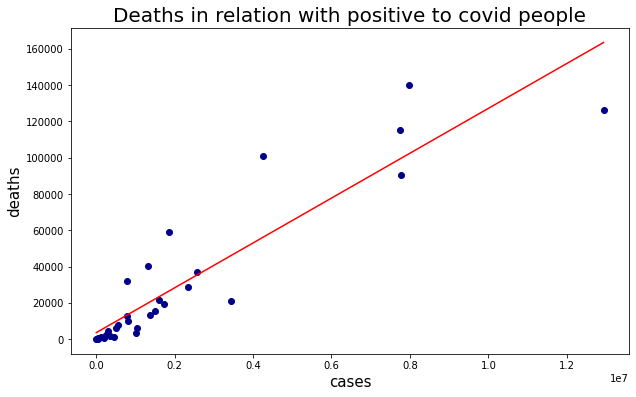

In [25]:
# Scatterplot deaths - cases
fig = plt.figure(figsize = (10, 6))


plt.scatter(df[['cases']],df['deaths'], c ="darkblue")
plt.plot(df[['cases']],y_pred,c='red')
plt.xlabel("cases",size=15)
plt.ylabel("deaths",size=15)
plt.rc('xtick',labelsize=13)
plt.title('Deaths in relation with positive to covid people',size=20)
plt.show()  

# As the cases increase, the deaths increase too

It is confirmed that there is a liner relationship so as the number of cases increases, the number of deaths is increases.

**To summarise all the above:**

- High number of cases as a unique criterion is not able to give us trustworthy conclusions about the impact of Covid in a country. The population of each country should be taken into account.

- Number of deaths is another significant factor that we should consider about.

- As the cases in a country increases, the number of deaths increases too in a linear way.